## CEIA - Visión por Computadora I - TP1

#### Consigna 

* Parte 1 (imágenes en `/white_patch` y `/coord_cromaticas`):
    1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
    2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
    3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

* Parte 2:
    1. Para las imágenes `img1_tp.png` y `img2_tp.png` leerlas con OpenCV en escala de grisas y visualizarlas.
    2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
    Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
    considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
    3. Para la imagen `segmentacion.png` analice el histograma de los canales RGB. Segmente algunos de los
    elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
    separadas.

--------------

#### Resolución 

In [2]:
# Importacion de librerias
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

------
##### Coordenadas cromáticas

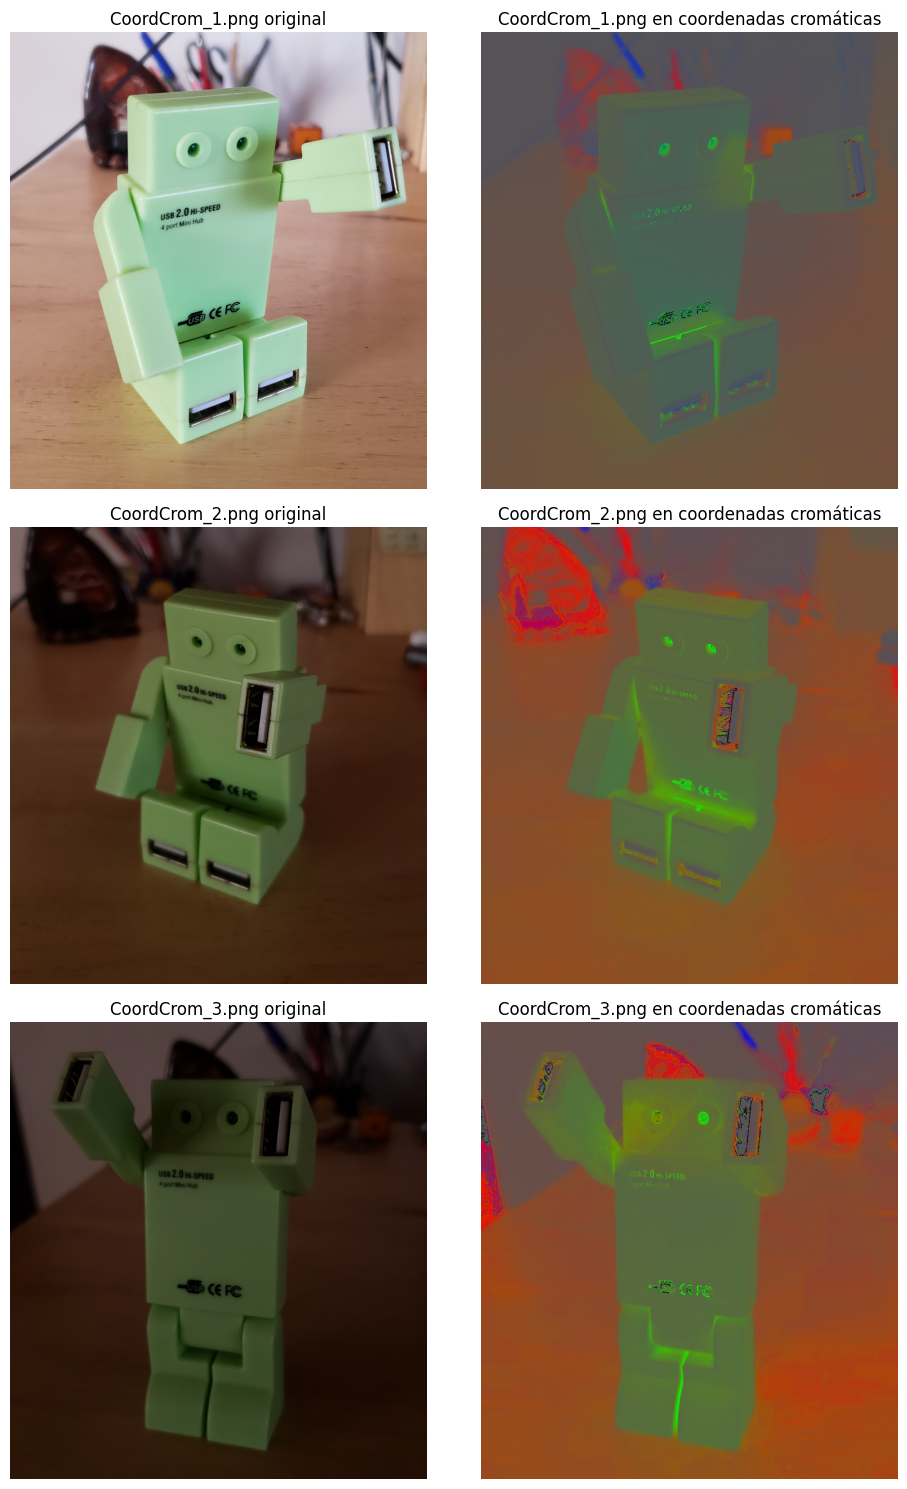

In [52]:
def convertir_a_coord_cromaticas(rgb_image):
    # Convertir a tipo float para evitar el problema 'Clipping input data to
    # the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
    rgb_image = rgb_image.astype(np.float64)

    # Obtener cada canal
    r, g, b = rgb_image[:,:,0], rgb_image[:,:,1], rgb_image[:,:,2]

    # Calcular la suma de los canales
    sum_rgb = r + g + b

    # Evitar división por cero (RuntimeWarning: invalid value encountered in divide)
    sum_rgb = np.where(sum_rgb == 0, 1e-9, sum_rgb)

    # Normalizar cada canal
    r_normalized = r / sum_rgb
    g_normalized = g / sum_rgb
    b_normalized = b / sum_rgb

    # Apilar los resultados en la ultima dimension
    coord_cromaticas = np.dstack([r_normalized, g_normalized, b_normalized])

    return coord_cromaticas


# Nombres de las imágenes
nombres_imagenes = ['CoordCrom_1.png', 'CoordCrom_2.png', 'CoordCrom_3.png']

# Cargamos las imagenes, las convertimos a RGB y coordenadas cromaticas
imagenes_coord_crom = []
imagenes_originales = []

for nombre_imagen in nombres_imagenes:
    img_bgr = cv.imread(f'coord_cromaticas/{nombre_imagen}')
    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

    img_coord_crom = convertir_a_coord_cromaticas(img_rgb)

    imagenes_originales.append(img_rgb)
    imagenes_coord_crom.append(img_coord_crom)


# Visualizar las imagenes originales y en coordenadas cromáticas
fig, ax = plt.subplots(len(imagenes_originales), 2, figsize=(10, len(imagenes_originales) * 5))
for i, nombre_imagen in enumerate(nombres_imagenes):
    ax[i, 0].imshow(imagenes_originales[i])
    ax[i, 0].set_title(f'{nombre_imagen} original')
    ax[i, 0].axis('off')

    ax[i, 1].imshow(imagenes_coord_crom[i])
    ax[i, 1].set_title(f'{nombre_imagen} en coordenadas cromáticas')
    ax[i, 1].axis('off')

plt.tight_layout()
plt.show()

-----
##### White Patch

In [ ]:
# wip

-----
##### Histogramas

In [ ]:
# wip

-----
##### Segmentación

In [ ]:
# wip